
 ### **Task 3: SB3**
- Implement a **SB3** agent in the env of your choice


In [1]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import SubprocVecEnv
import tensorboard

import highway_env  # noqa: F401

In [ ]:

TRAIN = True

if __name__ == "__main__":
    from stable_baselines3 import PPO
    from stable_baselines3.common.env_util import make_vec_env

    n_cpu = 6
    batch_size = 64

    env = make_vec_env("racetrack-v0", n_envs=n_cpu)

    def scheduler(initial_value):
      """
      Linear learning rate schedule.

      :param initial_value: Initial learning rate.
      :return: schedule function.
      """
      def func(progress_remaining):
          return progress_remaining * initial_value
      return func


    # model = PPO(
    #     "MlpPolicy",
    #     env,
    #     policy_kwargs=dict(net_arch=[dict(pi=[128, 128], vf=[256, 256])]),  # simpler actor
    #     n_steps=256,  # increased rollout length
    #     batch_size=batch_size,
    #     n_epochs=5,  # fewer epochs for efficiency
    #     learning_rate=scheduler(5e-4),  # scheduled learning rate
    #     gamma=0.95,  # longer-term planning
    #     verbose=2,
    #     tensorboard_log="racetrack_ppo/",
    # )

    model = PPO("MlpPolicy",
        env,
        policy_kwargs=dict(net_arch=[dict(pi=[256, 256], vf=[256, 256])]),
        n_steps=128, #batch_size * 12 // n_cpu,
        batch_size=batch_size,
        n_epochs=10,
        learning_rate=5e-4,
        gamma=0.9,
        verbose=2,
        tensorboard_log="racetrack_ppo_task_3/") 

    # Train the model
    if TRAIN:
        model.learn(total_timesteps=int(5e5))
        model.save("racetrack_ppo_task_3/model_final_3h")
        del model

    # Run the algorithm
    model = PPO.load("racetrack_ppo_task_3/model_final_3h", env=env)



Using cuda device
Logging to racetrack_ppo/PPO_2


c:\Users\tedma\miniconda3\envs\dl-env\Lib\site-packages\stable_baselines3\common\policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


----------------------------
| time/              |     |
|    fps             | 23  |
|    iterations      | 1   |
|    time_elapsed    | 5   |
|    total_timesteps | 128 |
----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 22          |
|    iterations           | 2           |
|    time_elapsed         | 11          |
|    total_timesteps      | 256         |
| train/                  |             |
|    approx_kl            | 0.005661944 |
|    clip_fraction        | 0.0234      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.42       |
|    explained_variance   | 0.0468      |
|    learning_rate        | 0.0005      |
|    loss                 | -0.0398     |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0247     |
|    std                  | 0.992       |
|    value_loss           | 0.185       |
-----------------------------------------

In [ ]:
import numpy as np

def evaluate_agent(env, agent, n_episodes=10):
    env_eval = gym.make("racetrack-v0", render_mode = "rgb_array")
    total_rewards = []
    n_successes = 0
    for episode in range(n_episodes):
        print(f"Evaluating episode {episode + 1}/{n_episodes}")
        obs, info = env_eval.reset()
        done = False
        total_reward = 0
        n_step = 0
        while not done:
            n_step+=1
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, done, truncated, info = env_eval.step(action)
            total_reward += reward
            if n_step > 200:
                done = True
        total_rewards.append(total_reward)
        if not info['crashed']:
            n_successes += 1
    return np.mean(total_rewards), np.std(total_rewards), n_successes / n_episodes

# Evaluate the agent
mean_reward, std_reward, success_rate = evaluate_agent(env, model)
print(f"Mean Reward: {mean_reward:.2f} ± {std_reward:.2f}")
print(f"Success Rate: {success_rate:.2%}")

Visualisation

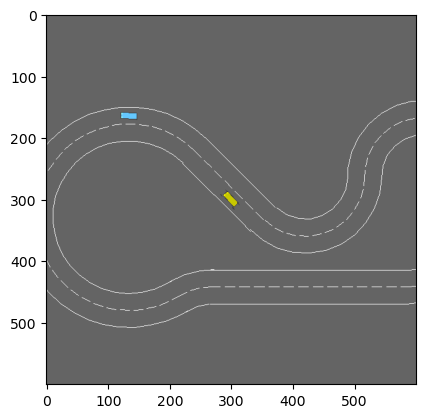

In [6]:
import gymnasium as gym
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import time

# Make sure racetrack-v0 is registered (e.g., via gymnasium or other custom environment)
env = gym.make("racetrack-v0", render_mode="rgb_array")

# Assuming 'model' is already trained and available
frames = []
start = time.time()

done = truncated = False
obs, info = env.reset()
while not (done or truncated):
    action, _ = model.predict(obs, deterministic=False)
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    time_elapsed = time.time() - start
    if time_elapsed > 10:
        done = True

env.close()

# Create animation
fig = plt.figure()
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=50, blit=True)

# Display animation in notebook
HTML(ani.to_jshtml())


In [8]:
env = gym.make("racetrack-v0", render_mode = "rgb_array")

while True:
  done = truncated = False
  obs, info = env.reset()
  while not (done or truncated):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()

AttributeError: 'NoneType' object has no attribute 'get_image'